# ДЗ к лекции "Визуализация данных"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import requests
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
(df.isna().mean() * 100).round(2) # процент пропусков в df (пропуски - это NaN)

Overall rank                    0.0
Country or region               0.0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: float64

In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
print('Значение моды: ', df['Score'].mode()[0])
print('Значение медианы: ', df['Score'].median())
# как видно значения средней, моды и медианы приблизительно равны и находятся в диапазоне 5,2 - 5,4
# следует ожидать относительно равномерного распределения

Значение моды:  5.208
Значение медианы:  5.3795


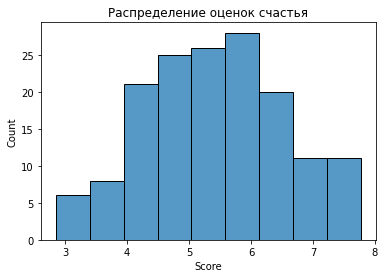

In [ ]:
# ожидания нормального распределения подтвердилось
# наибольшее количество стран счастливы в диапазоне от 4 до 6,8 баллов
sns.histplot(df['Score'])
plt.title('Распределение оценок счастья')

👀
*Почему так отличаются графики гистрограмм и какой из них достоверен???*

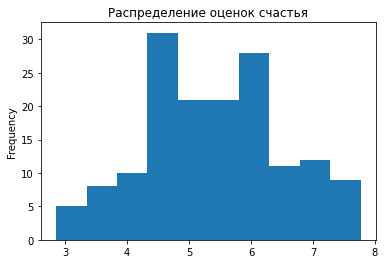

In [ ]:
# распределение баллов счастья
df['Score'].plot(kind='hist', 
                   title='Распределение оценок счастья')

[None, None, None, None, None, None, None, None, None, None, None, None]

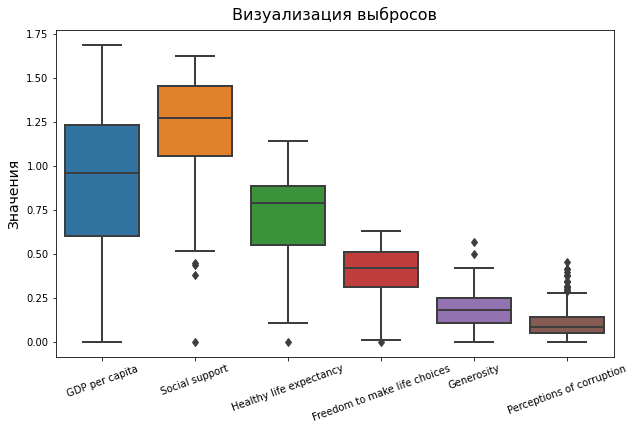

In [ ]:
plt.figure(figsize = (10,6))
plt.title('Визуализация выбросов', fontsize = 16, pad=10)

ax= sns.boxplot(data=df[
    ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'
    , 'Generosity', 'Perceptions of corruption']
        ], linewidth=2,fliersize=6)

ax.set_ylabel("Значения", fontsize=14, labelpad=5)
plt.setp(ax.get_xticklabels(), rotation=20)

# Наблюдаем выбросы по социальной поддержке, здоровью, щедрости и коррупции

In [ ]:
# рассмотрим страны с выбросами:
df1 = df['Country or region'][df['Social support'] < 0.5].iloc[0::].tolist()
print('Аномально низкие значения по социальной поддержки:','\n', ', '.join(df1))
print('----------------------------------------------------------')
df2 = df['Country or region'][df['Healthy life expectancy'] < 0.1].iloc[0::].tolist()
print('Аномально низкие значения по продолжительности жизни:','\n', ', '.join(df2))
print('----------------------------------------------------------')
df3 = df['Country or region'][df['Generosity'] > 0.4].iloc[0::].tolist()
print('Аномально высокие значения по щедрости:','\n', ', '.join(df3))
print('----------------------------------------------------------')
df4 = df['Country or region'][df['Perceptions of corruption'] > 0.3].iloc[0::].tolist()
print('Аномально высокие значения по коррупции:','\n', ', '.join(df4))

Аномально низкие значения по социальной поддержки: 
 Benin, Burundi, Syria, Central African Republic
----------------------------------------------------------
Аномально низкие значения по продолжительности жизни: 
 Swaziland
----------------------------------------------------------
Аномально высокие значения по щедрости: 
 Indonesia, Myanmar, Haiti
----------------------------------------------------------
Аномально высокие значения по коррупции: 
 Finland, Denmark, Norway, Switzerland, Sweden, New Zealand, Canada, Luxembourg, Ireland, Singapore, Rwanda


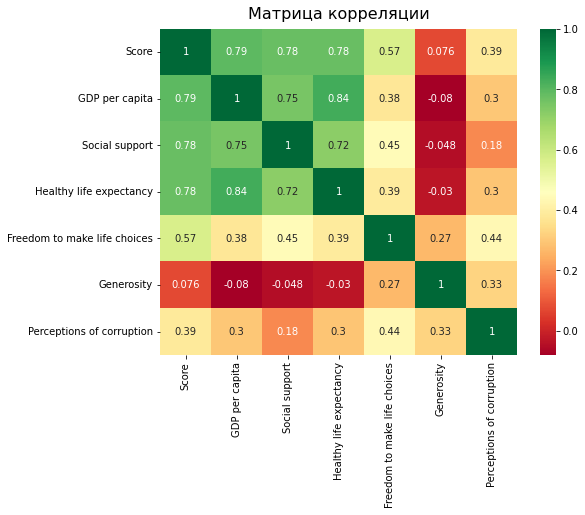

In [ ]:
plt.figure(figsize = (8,6))
plt.title('Матрица корреляции', fontsize = 16, pad=10)
sns.heatmap(df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices'
            , 'Generosity', 'Perceptions of corruption']
        ].corr()
            , annot=True, cmap='RdYlGn')

# ВВП, социальная поддержка и продолжительность жизни сильно коррелируется с оценкой счастью.
# Наименее значимым показателем является щедрость.

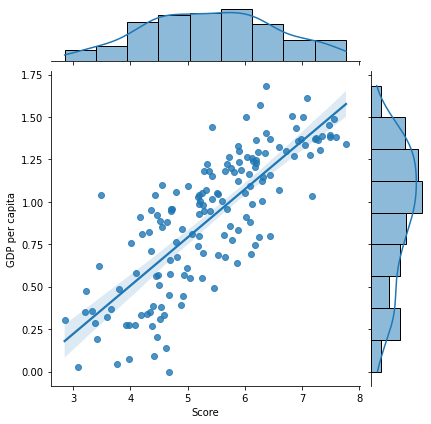

In [ ]:
# например, рассмотрим зависимость оценки счастья от ВВП - наблюдается прямая зависимость
sns.jointplot(x='Score', y='GDP per capita', data=df, kind='reg')

In [ ]:
# тройка лучших стран по индексу счастья
# наименование страны присваиваем в качестве индекса (для диаграммы ниже)
top_max = df.sort_values('Score',ascending=False).iloc[:3, 1:3].set_index('Country or region')

In [ ]:
# тройка худших стран по индексу счастья
top_min = df.sort_values('Score',ascending=False).iloc[-3:, 1:3].set_index('Country or region')

In [ ]:
top = pd.concat([top_max, top_min])
top

,Score
Country or region,
Finland,7.769
Denmark,7.600
Norway,7.554
Afghanistan,3.203
Central African Republic,3.083
South Sudan,2.853


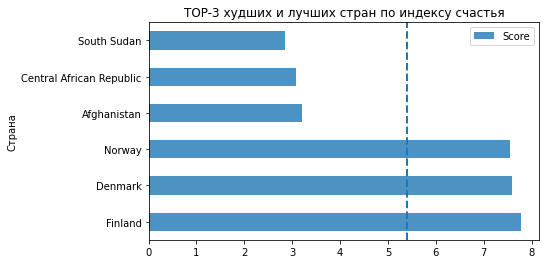

In [ ]:
top.plot(kind='barh'
        , title='TOP-3 худших и лучших стран по индексу счастья'
        , xlabel='Страна'
        , ylabel='Индекс счастья'
        , alpha=0.8 # прозрачность цветов
        , figsize=(7, 4))

plt.axvline(df['Score'].mean() # средний рейтинг счасть по всем странам в исходном df
        , linestyle = 'dashed' # тип линии (сплошная, пунктир и прочее)
        , linewidth = 2)

In [ ]:
ull_vac = dict(
        type = 'choropleth',
        colorscale = 'rdylgn', # выбор цветовой гаммы
        locations = df['Country or region'],
        locationmode = "country names",
        z = df['Score'],
        text = df['Country or region'],
        colorbar = {'title' : 'Индекс счастья'},
      )

layout = dict(title = 'Карта мира с индексом счастья', 
              geo = dict(projection = {'type':'robinson'}, # из всех самая удобная форма отображения
                         showlakes = True))
fig = go.Figure(data = [ull_vac], 
              layout = layout)
fig.show()
# самый красивый и инуитивно понятный график

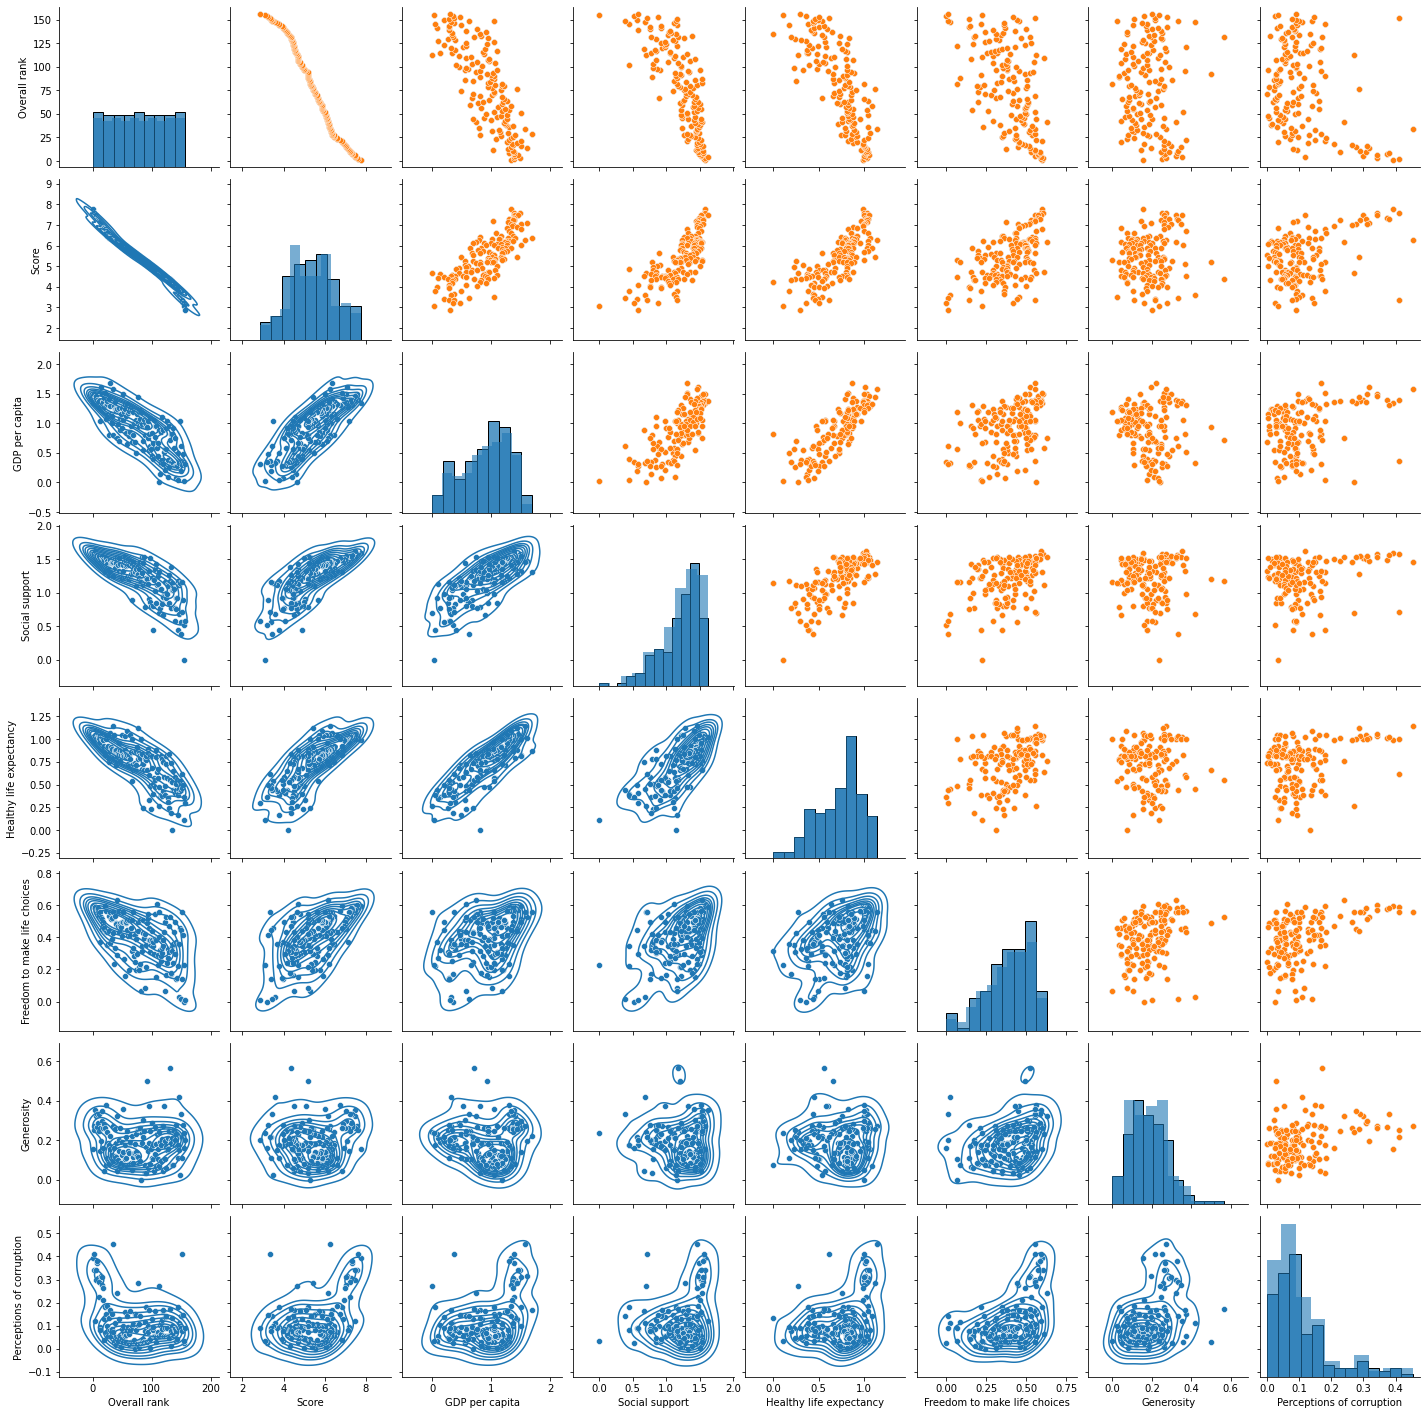

In [ ]:
# отображение зависимостей сразу по всем признакам df
g = sns.pairplot(data=df)
g.map_upper(sns.scatterplot)
g.map_diag(plt.hist, alpha=0.6)
g.map_lower(sns.kdeplot);